# Correlation

In this notebook, we compute the correlations between the time series of the administrative regions of a selected country. Through this analysis, we can identify time series with high correlations between them and then decide to exclude some for subsequent analyzes.

In [1]:
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 10) # fontsize of the x and y labels
plt.rc("axes", titlesize = 10) # fontsize of the axes title
plt.rc("xtick", labelsize = 10) # fontsize of the tick labels
plt.rc("ytick", labelsize = 10) # fontsize of the tick labels
plt.rc("legend", fontsize = 15) # legend fontsize

In [3]:
COUNTRY = "Cameroon"

In [4]:
PATH_TO_DATA_FOLDER = f"../Dataset time-series/output_data/{COUNTRY}/"

## Time series dataset

In [5]:
# Load the time series data.
df = pd.read_csv(PATH_TO_DATA_FOLDER + COUNTRY + ".csv", header = [0, 1], index_col = 0)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq

In [6]:
df.columns.get_level_values(1).unique()

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'Area', 'Code', 'FCG', 'Fatalities', 'Lat', 'Lon', 'NDVI',
       'NDVI Anomaly', 'Population', 'Rainfalls (mm)', 'Ramadan', 'Waterways',
       'rCSI'],
      dtype='object', name='Indicator')

In [7]:
# Consider only some indicators for the analysis with correlation.
INDICATORS_TO_CONSIDER = ["FCG", "1 Month Anomaly Rainfalls (%)", "3 Months Anomaly Rainfalls (%)", 
                          "NDVI", "Price cereals and tubers", "Fatalities", "NDVI Anomaly", 
                          "rCSI", "Rainfalls (mm)"] 

df = df.loc[:, df.columns.get_level_values(1).isin(INDICATORS_TO_CONSIDER)]
df.head()

AdminStrata                       Adamawa                                     \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) FCG   
Datetime                                                                       
2018-01-01                            NaN                            NaN NaN   
2018-01-02                            NaN                            NaN NaN   
2018-01-03                            NaN                            NaN NaN   
2018-01-04                            NaN                            NaN NaN   
2018-01-05                            NaN                            NaN NaN   

AdminStrata                                                   \
Indicator   Fatalities NDVI NDVI Anomaly Rainfalls (mm) rCSI   
Datetime                                                       
2018-01-01         NaN  NaN          NaN            NaN  NaN   
2018-01-02         NaN  NaN          NaN            NaN  NaN   
2018-01-03         NaN  NaN          NaN            NaN  NaN   
2018-01-04         NaN  NaN          NaN            NaN  NaN   
2018-01-05         NaN  NaN          NaN            NaN  NaN   

AdminStrata                       Central                                 ...  \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)  ...   
Datetime                                                                  ...   
2018-01-01                            NaN                            NaN  ...   
2018-01-02                            NaN                            NaN  ...   
2018-01-03                            NaN                            NaN  ...   
2018-01-04                            NaN                            NaN  ...   
2018-01-05                            NaN                            NaN  ...   

AdminStrata     South-West                               West  \
Indicator   Rainfalls (mm) rCSI 1 Month Anomaly Rainfalls (%)   
Datetime                                                        
2018-01-01             NaN  NaN                           NaN   
2018-01-02             NaN  NaN                           NaN   
2018-01-03             NaN  NaN                           NaN   
2018-01-04             NaN  NaN                           NaN   
2018-01-05             NaN  NaN                           NaN   

AdminStrata                                                                  \
Indicator   3 Months Anomaly Rainfalls (%) FCG Fatalities NDVI NDVI Anomaly   
Datetime                                                                      
2018-01-01                             NaN NaN        NaN  NaN          NaN   
2018-01-02                             NaN NaN        NaN  NaN          NaN   
2018-01-03                             NaN NaN        NaN  NaN          NaN   
2018-01-04                             NaN NaN        NaN  NaN          NaN   
2018-01-05                             NaN NaN        NaN  NaN          NaN   

AdminStrata                      
Indicator   Rainfalls (mm) rCSI  
Datetime                         
2018-01-01             NaN  NaN  
2018-01-02             NaN  NaN  
2018-01-03             NaN  NaN  
2018-01-04             NaN  NaN  
2018-01-05             NaN  NaN  

[5 rows x 80 columns]

## Correlations

### Nature indicators

In [8]:
select = df.columns.get_level_values(1).isin(["FCG", "NDVI", "NDVI Anomaly", "Rainfalls (mm)", "1 Month Anomaly Rainfalls (%)", "3 Months Anomaly Rainfalls (%)"])
df_nature = df.loc[:, select]
df_nature.head()

AdminStrata                       Adamawa                                     \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) FCG   
Datetime                                                                       
2018-01-01                            NaN                            NaN NaN   
2018-01-02                            NaN                            NaN NaN   
2018-01-03                            NaN                            NaN NaN   
2018-01-04                            NaN                            NaN NaN   
2018-01-05                            NaN                            NaN NaN   

AdminStrata                                                        Central  \
Indicator   NDVI NDVI Anomaly Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                                     
2018-01-01   NaN          NaN            NaN                           NaN   
2018-01-02   NaN          NaN            NaN                           NaN   
2018-01-03   NaN          NaN            NaN                           NaN   
2018-01-04   NaN          NaN            NaN                           NaN   
2018-01-05   NaN          NaN            NaN                           NaN   

AdminStrata                                          ... South-West       \
Indicator   3 Months Anomaly Rainfalls (%) FCG NDVI  ...        FCG NDVI   
Datetime                                             ...                   
2018-01-01                             NaN NaN  NaN  ...        NaN  NaN   
2018-01-02                             NaN NaN  NaN  ...        NaN  NaN   
2018-01-03                             NaN NaN  NaN  ...        NaN  NaN   
2018-01-04                             NaN NaN  NaN  ...        NaN  NaN   
2018-01-05                             NaN NaN  NaN  ...        NaN  NaN   

AdminStrata                                                      West  \
Indicator   NDVI Anomaly Rainfalls (mm) 1 Month Anomaly Rainfalls (%)   
Datetime                                                                
2018-01-01           NaN            NaN                           NaN   
2018-01-02           NaN            NaN                           NaN   
2018-01-03           NaN            NaN                           NaN   
2018-01-04           NaN            NaN                           NaN   
2018-01-05           NaN            NaN                           NaN   

AdminStrata                                                       \
Indicator   3 Months Anomaly Rainfalls (%) FCG NDVI NDVI Anomaly   
Datetime                                                           
2018-01-01                             NaN NaN  NaN          NaN   
2018-01-02                             NaN NaN  NaN          NaN   
2018-01-03                             NaN NaN  NaN          NaN   
2018-01-04                             NaN NaN  NaN          NaN   
2018-01-05                             NaN NaN  NaN          NaN   

AdminStrata                 
Indicator   Rainfalls (mm)  
Datetime                    
2018-01-01             NaN  
2018-01-02             NaN  
2018-01-03             NaN  
2018-01-04             NaN  
2018-01-05             NaN  

[5 rows x 60 columns]

In [9]:
# Compute the correlation between the nature time series for the various administrative regions: we then obtain a list of correlation matrices equal to the number of administrative regions.
corr_matrices_nature = list()

def correlation_matrices_nature(group):
    group.columns = group.columns.droplevel()
    mtrx = group.corr(method = "pearson")
    corr_matrices_nature.append(mtrx)

df_nature.groupby(level = 0, axis = 1).apply(correlation_matrices_nature);

In [10]:
# We take the mean of the various correlation matrices (administrative regions).
CORR_nature_mean = pd.DataFrame(np.mean(np.stack(corr_matrices_nature, axis = 0), axis = 0), index = df_nature.columns.droplevel().unique(), columns = df_nature.columns.droplevel().unique())
corr = CORR_nature_mean.style.background_gradient(cmap = "coolwarm")

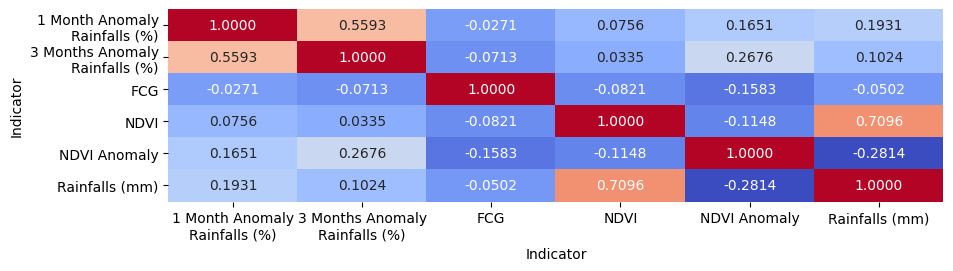

In [11]:
fig, ax = plt.subplots(figsize = (10, 2.5)) 
s = sns.heatmap(CORR_nature_mean, cmap = "coolwarm", annot = True, cbar = False, fmt = ".4f", ax = ax)
# Extract labels.
labels = ax.get_xticklabels()
# Fix the labels.
for v in labels:
    text = v.get_text()
    text = "\n".join(wrap(text, 20))
    v.set_text(text)
# Set the new labels.
ax.set_xticklabels(labels, rotation = 0)
ax.set_yticklabels(labels, rotation = 0)

fig.savefig(f"./output_images/nature_indicators_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

### All indicators

In [12]:
# Compute the correlation between all the time series for the various administrative regions: we then obtain a list of correlation matrices equal to the number of administrative regions.
corr_matrices = list()

def correlation_matrices(group):
    group.columns = group.columns.droplevel()
    mtrx = group.corr(method = "pearson").values
    if not np.isnan(np.sum(mtrx)): # nan if the time series is completly flat (fatalities).
        corr_matrices.append(mtrx)

df.groupby(level = 0, axis = 1).apply(correlation_matrices);

In [13]:
# We take the mean of the various correlation matrices (administrative regions).
CORR_mean = pd.DataFrame(np.mean(np.stack(corr_matrices, axis = 0), axis = 0), index = df.columns.droplevel().unique(), columns = df.columns.droplevel().unique())
corr = CORR_mean.style.background_gradient(cmap = "coolwarm")

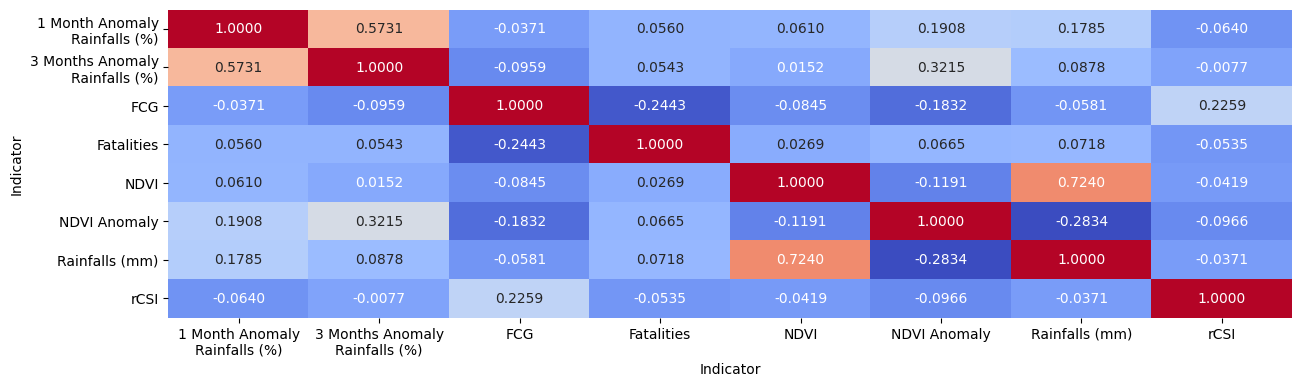

In [14]:
fig, ax = plt.subplots(figsize = (14.5, 4)) 
s = sns.heatmap(CORR_mean, cmap = "coolwarm", annot = True, cbar = False, fmt = ".4f", ax = ax)
# Extract labels.
labels = ax.get_xticklabels()
# Fix the labels.
for v in labels:
    text = v.get_text()
    text = "\n".join(wrap(text, 20))
    v.set_text(text)
# Set the new labels.
ax.set_xticklabels(labels, rotation = 0)
ax.set_yticklabels(labels, rotation = 0)

fig.savefig(f"./output_images/all_indicators_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)